### Outlier??
#### What??
An Outlier is an observation(data-point) in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the dataset.

### Why & How??

An outlier may occur due to the variability in the data, or due to experimental error/human error.

They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution)

### Affect???
Statistics=>> 1). Primary : Mean, Median, and Mode & 2). Derived : Variance, and Standard Deviation
They help us describe the data.

#### Mean is the accurate measure to describe the data when we do not have any outliers present.

#### Median is used if there is an outlier in the dataset.

#### Mode is used if there is an outlier & about one-half or more of the data is the same.

## ‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

Example:
Consider a small dataset, sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]. By looking at it, one can quickly say ‘101’ is an outlier that is much larger than the other values.

In [23]:
sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

In [5]:
increasing_order_sample = [5, 7, 9, 10, 11, 13, 15, 15, 16, 18, 21, 101]
increasing_order_sample

[5, 7, 9, 10, 11, 13, 15, 15, 16, 18, 21, 101]

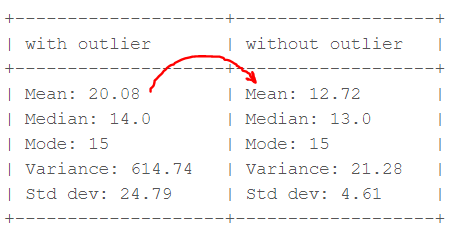

### Detecting Outliers
If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

### Boxplots
### Z-score
### Inter Quantile Range(IQR)

### 1. Detecting outliers using Boxplot:

Text(0.5, 0, 'Sample')

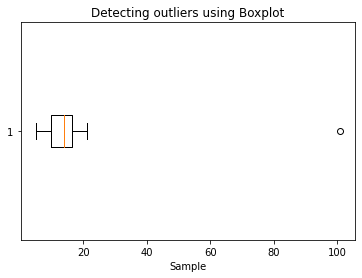

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

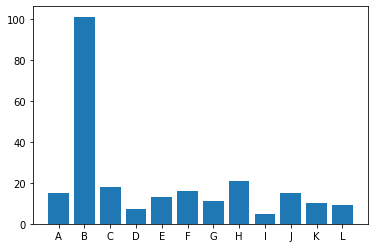

In [8]:
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
y = sample
plt.bar(x, y)
plt.show()

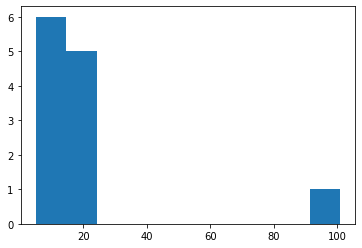

In [9]:
plt.hist(sample)
plt.show()

#### most data points are around 20, but 101 is much away from rest 

### 2. Detecting outliers using the Z-scores : The best


Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

### Steps:

Loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.

Define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

In [24]:
import numpy as np

In [11]:
mean = np.mean(sample)
mean

20.083333333333332

In [12]:
std = np.std(sample)
std

24.794012494059036

In [25]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    μ = np.mean(data) # mean 
    σ = np.std(data) # std
    print(μ, σ)
    for x in data:
        z_score = (x-μ)/σ
        if (np.abs(z_score) > thres):
            outliers.append(x)
    return outliers

In [14]:
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

20.083333333333332 24.794012494059036
Outliers from Z-scores method:  [101]


#### Outliers from Z-scores method: [101] 

In [15]:
outliers = []
def detect_outliers_zscore(data):
    thres = 0.5
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

20.083333333333332 24.794012494059036
Outliers from Z-scores method:  [101, 7, 5]


## 3. Detecting outliers using the Inter Quantile Range(IQR)  : Percentile Method

### Criteria: 
            data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

### Steps:
Sort the dataset in ascending order

Calculate the 1st and 3rd quartiles(Q1, Q3)

Compute IQR=Q3-Q1 : (Range)

Compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)

Loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [16]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    print(Q1, Q3)
    IQR = Q3-Q1
    lwr_bound = Q1-(1.5*IQR)
    upr_bound = Q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [17]:
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

9.75 16.5
-0.375 26.625
Outliers from IQR method:  [101]


###### Outliers from IQR method: [101]

In [18]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    Q1 = np.percentile(data, 20)
    Q3 = np.percentile(data, 80)
    print(Q1, Q3)
    IQR = Q3-Q1
    lwr_bound = Q1-(1.5*IQR)
    upr_bound = Q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

9.2 17.6
-3.400000000000004 30.200000000000003
Outliers from IQR method:  [101]


In [33]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    Q1 = np.percentile(data, 40)
    Q3 = np.percentile(data, 60)
    print(Q1, Q3)
    IQR = Q3-Q1
    lwr_bound = Q1-(1.5*IQR)
    upr_bound = Q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

11.8 15.0
7.000000000000002 19.799999999999997
Outliers from IQR method:  [5, 7, 21, 101]


In [19]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    Q1 = np.percentile(data, 5)
    Q3 = np.percentile(data, 95)
    print(Q1, Q3)
    IQR = Q3-Q1
    lwr_bound = Q1-(1.5*IQR)
    upr_bound = Q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

6.1000000000000005 56.99999999999994
-70.24999999999991 133.34999999999985
Outliers from IQR method:  []


## Handling Outliers:

WHAT do we do with the outliers?

### Methods of treating the outliers::

#### Trimming/removing the outlier
#### Quantile based flooring and capping 
#### Mean/Median imputation

## 1 Trimming/Remove the outliers: 

In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.

In [27]:
# Trimming
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i))
print(a)
print(len(sample), len(a))

NameError: name 'a' is not defined

## 2 Quantile based flooring and capping:

In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.

In [28]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

NameError: name 'b' is not defined

##### The above code outputs: New array: [15, 20.7, 18, 7.2, 13, 16, 11, 20.7, 7.2, 15, 10, 9]

..

The data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with 90th percentile value.

### 3 Mean/Median imputation:

As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

In [29]:
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]


NameError: name 'c' is not defined

### Visualizing the data after treating the outlier


In [30]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

NameError: name 'c' is not defined